R Exam answers - Guillermo Chumaceiro

## Task 1

In [1]:
# Read the GDP.csv data
gdp_df <- read.csv('GDP.csv', header=TRUE, sep=",")

# Read the HDI.csv data
hdi_df <- read.csv('HDI.csv', header=TRUE, sep=",")

## Task 2

In [6]:
head(gdp_df) # Print the first lines of the GDP dataframe
str(gdp_df) # Print a summary of the GDP DF

,Province,GDP.per.capita,CCAA
,<chr>,<dbl>,<chr>
1,Almería,20.873,Andalucía y Extremadura
2,Cádiz,18.029,Andalucía y Extremadura
3,Córdoba,17.292,Andalucía y Extremadura
4,Granada,17.167,Andalucía y Extremadura
5,Huelva,18.207,Andalucía y Extremadura
6,Jaén,16.433,Andalucía y Extremadura


'data.frame':	50 obs. of  3 variables:
 $ Province      : chr  "Almería" "Cádiz" "Córdoba" "Granada" ...
 $ GDP.per.capita: num  20.9 18 17.3 17.2 18.2 ...
 $ CCAA          : chr  "Andalucía y Extremadura" "Andalucía y Extremadura" "Andalucía y Extremadura" "Andalucía y Extremadura" ...


In [7]:
head(hdi_df) # Print the first lines of the HDI dataframe
str(hdi_df) # Print a summary of the HDI DF

,Province,HDI
,<chr>,<dbl>
1,Cádiz,0.913
2,Almería,0.915
3,Jaén,0.915
4,Huelva,0.917
5,Badajoz,0.919
6,Córdoba,0.920


'data.frame':	50 obs. of  2 variables:
 $ Province: chr  "Cádiz" "Almería" "Jaén" "Huelva" ...
 $ HDI     : num  0.913 0.915 0.915 0.917 0.919 0.92 0.92 0.921 0.923 0.924 ...


## Task 3

To solve this problem I first sort both dataframes by the Province column and then join them vertically with cbind.

In [17]:
# Sort both dataframes by the Province column
sorted_gdp_df <- gdp_df[order(gdp_df$Province), ]
sorted_hdi_df <- hdi_df[order(hdi_df$Province), ]

# Join two dataframes by columns.
joined_df <- cbind(sorted_gdp_df, sorted_hdi_df)

## Task 4

The subset method allows to select all the columns except the fourth, which is the repeated Province column (-c(4))

In [22]:
# Delete one province column
final_df <- subset(joined_df, select = -c(4))

## Task 5

In [23]:
head(final_df)

,Province,GDP.per.capita,CCAA,HDI
,<chr>,<dbl>,<chr>,<dbl>
48,Álava,36.055,País Vasco Navarra y Rioja,0.990
26,Albacete,17.864,Castilla-La Mancha,0.933
34,Alicante,19.201,Comunitat Valenciana y Murcia,0.930
1,Almería,20.873,Andalucía y Extremadura,0.915
12,Asturias,21.634,Asturias y Cantabria,0.956
16,Ávila,18.382,Castilla y León,0.952


In [24]:
tail(final_df)

,Province,GDP.per.capita,CCAA,HDI
,<chr>,<dbl>,<chr>,<dbl>
29,Toledo,19.251,Castilla-La Mancha,0.933
36,Valencia,22.538,Comunitat Valenciana y Murcia,0.946
24,Valladolid,23.947,Castilla y León,0.978
50,Vizcaya,27.705,País Vasco Navarra y Rioja,0.988
25,Zamora,17.952,Castilla y León,0.959
11,Zaragoza,26.082,Aragon,0.968


## Task 6

We use the data in final_df to make a scatterplot of the HDI vs GDP, and coloring the points by it's corresponding CCAA

In [27]:
# Load the ggplot 2 library
library("ggplot2")

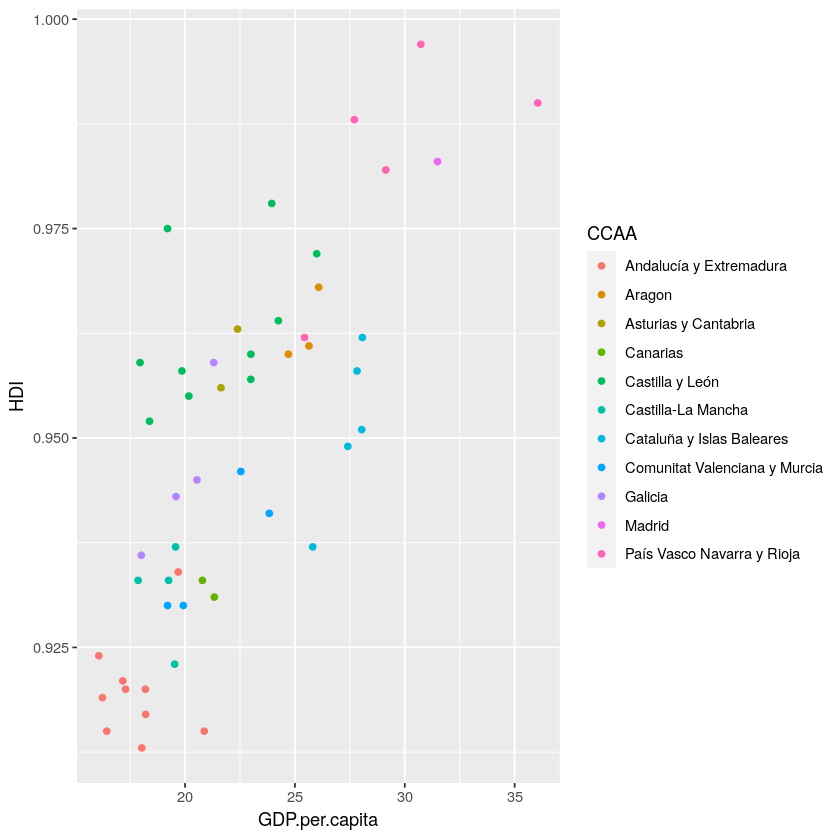

In [113]:
ggplot(final_df, aes(x = GDP.per.capita, y = HDI, color = CCAA)) + geom_point()

## Task 7

geom_text allows us to plot each label of the Provinces in the position of the points, colored by the CCAA

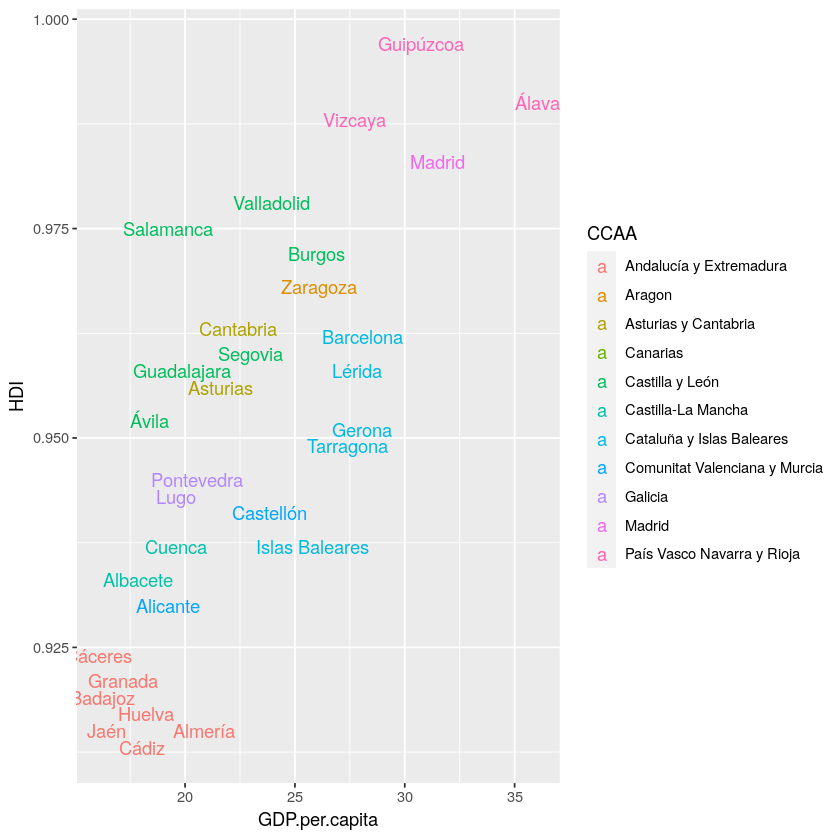

In [112]:
ggplot(final_df, aes(x = GDP.per.capita, y = HDI, color = CCAA)) + geom_text(aes(label=Province), check_overlap=TRUE)

## Task 8

We aggregate the data by the CCAA column and calculate the mean and standard deviation from the GDP and HDI columns

In [45]:
# Calculate the mean of the GDP and HDI, grouping by CCAA
mean_df <- aggregate(final_df[,c("GDP.per.capita", "HDI")], by=list(final_df$CCAA), FUN="mean")
mean_df

Group.1,GDP.per.capita,HDI
<chr>,<dbl>,<dbl>
Andalucía y Extremadura,17.81970,0.91980
Aragon,25.47433,0.96300
Asturias y Cantabria,22.01200,0.95950
Canarias,21.06150,0.93200
Castilla y León,21.57390,0.96300
Castilla-La Mancha,19.05250,0.93150
Cataluña y Islas Baleares,27.43120,0.95140
Comunitat Valenciana y Murcia,21.37275,0.93675
Galicia,19.86075,0.94575


In [46]:
# Calculate the standard deviation of the GDP and HDI, grouping by CCAA
sd_df <- aggregate(final_df[,c("GDP.per.capita", "HDI")], by=list(final_df$CCAA), FUN="sd")
sd_df

Group.1,GDP.per.capita,HDI
<chr>,<dbl>,<dbl>
Andalucía y Extremadura,1.5391112,0.005977736
Aragon,0.7045824,0.004358899
Asturias y Cantabria,0.5345727,0.004949747
Canarias,0.3839590,0.001414214
Castilla y León,2.7926986,0.008956686
Castilla-La Mancha,0.8047768,0.005972158
Cataluña y Islas Baleares,0.9434594,0.009607289
Comunitat Valenciana y Murcia,2.1781260,0.008057088
Galicia,1.4205488,0.009639329


## Task 9

In [71]:
# Variables for each column of the dataframe
ccaa <- mean_df["Group.1"]
mean_gdp <- mean_df["GDP.per.capita"]
mean_hdi <- mean_df["HDI"]
sd_gdp <- sd_df["GDP.per.capita"]
sd_hdi <- sd_df["HDI"]

# Create a new dataframe with the respective columns
summary_df <- data.frame(ccaa,mean_gdp,mean_hdi, sd_gdp, sd_hdi)
# Assign new names to the columns
colnames(summary_df) <- c("CCAA","mean.gdp","mean.hdi","sd.gdp","sd.hdi")

In [72]:
summary_df

CCAA,mean.gdp,mean.hdi,sd.gdp,sd.hdi
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Andalucía y Extremadura,17.81970,0.91980,1.5391112,0.005977736
Aragon,25.47433,0.96300,0.7045824,0.004358899
Asturias y Cantabria,22.01200,0.95950,0.5345727,0.004949747
Canarias,21.06150,0.93200,0.3839590,0.001414214
Castilla y León,21.57390,0.96300,2.7926986,0.008956686
Castilla-La Mancha,19.05250,0.93150,0.8047768,0.005972158
Cataluña y Islas Baleares,27.43120,0.95140,0.9434594,0.009607289
Comunitat Valenciana y Murcia,21.37275,0.93675,2.1781260,0.008057088
Galicia,19.86075,0.94575,1.4205488,0.009639329


## Task 10

To solve this task, we first set the values of the summary dataframe where the values are NA to zero. Then to check if the values where changed, we print the row of data where CCAA is Madrid

In [110]:
summary_df[is.na(summary_df)] = 0 # Change NA values to zero
summary_df[summary_df['CCAA'] == "Madrid"] # Check if changes where made

[1] "Madrid"      "31.49000"    "0.98300"     "0.0000000"   "0.000000000"

## Task 11

Create a scatterplot with the same data as before

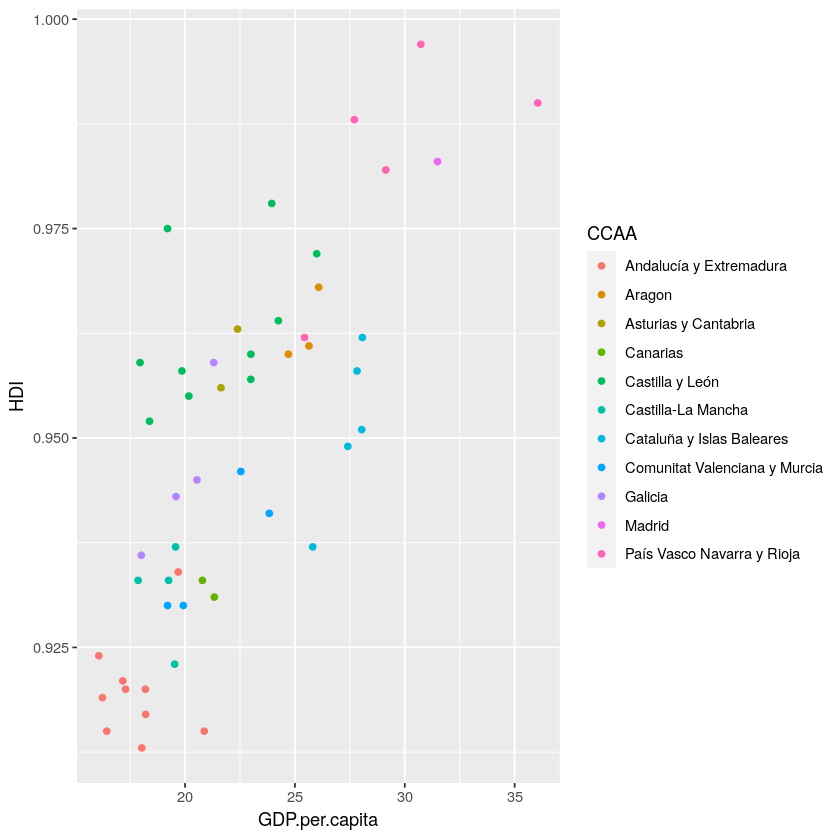

In [82]:
ggplot(final_df, aes(x = GDP.per.capita, y = HDI, color = CCAA)) + geom_point()

## Task 12

Add two scatterplots in the same plot, we do this by adding geom_points and specifying the data and values of x and y for each scatterplot. The second scatterplot uses the mean values calculated before

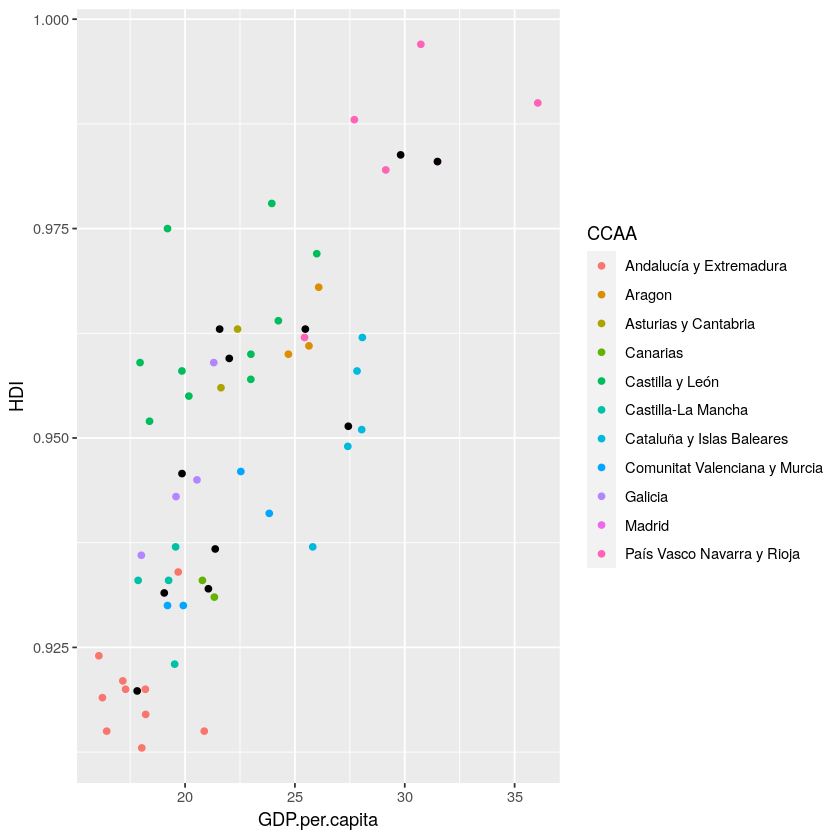

In [83]:
ggplot() + 
geom_point(data=final_df, aes(x = GDP.per.capita, y = HDI, color = CCAA)) +
geom_point(data=summary_df, aes(x= mean.gdp, y= mean.hdi))

## Task 13

On top of that, we add the error bars using the standard deviation dataframe, adding and substracting the std to each mean value

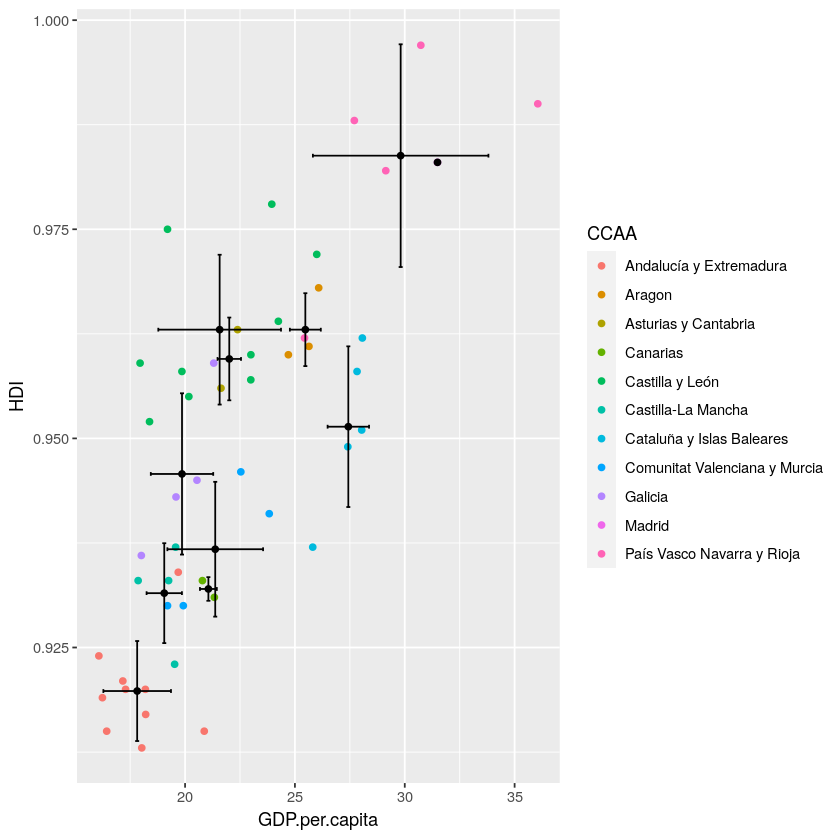

In [91]:
ggplot() + 
geom_point(data=final_df, aes(x = GDP.per.capita, y = HDI, color = CCAA)) +
geom_point(data=summary_df, aes(x= mean.gdp, y= mean.hdi)) +
geom_errorbar(data=summary_df, aes(x=mean.gdp, y=mean.hdi, ymin=mean.hdi-sd.hdi, ymax=mean.hdi +sd.hdi)) +
geom_errorbarh(data=summary_df, aes(y=mean.hdi, xmin=mean.gdp-sd.gdp, xmax=mean.gdp +sd.gdp))

## Task 14

On top of the previous plot we add labels of each CCAA to the mean points, this way the plot is more descriptive.

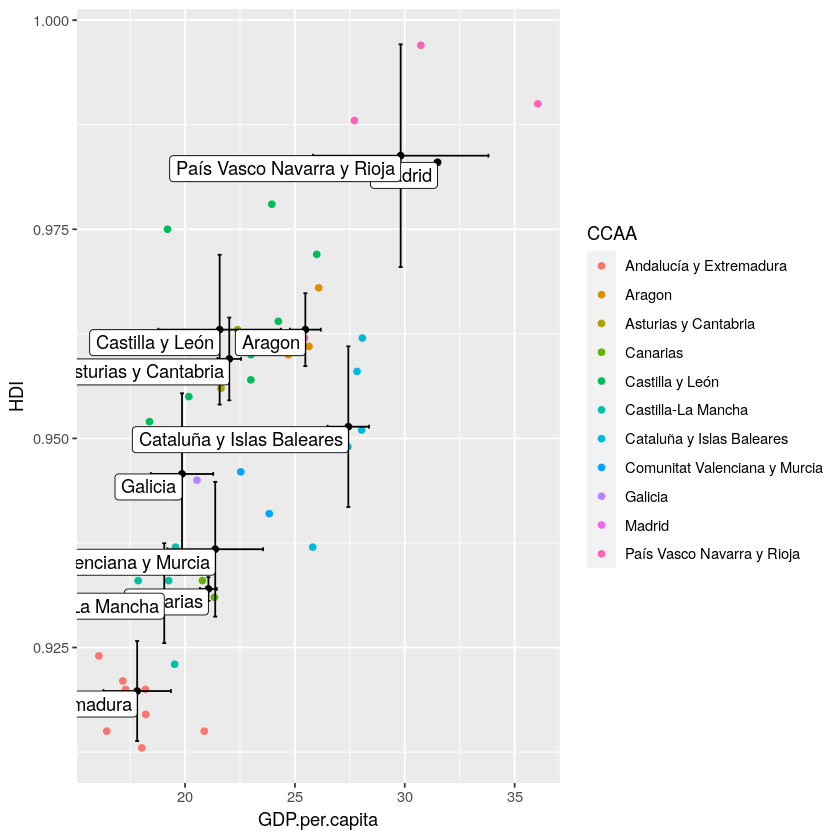

In [108]:
ggplot() + 
geom_point(data=final_df, aes(x = GDP.per.capita, y = HDI, color = CCAA)) +
geom_point(data=summary_df, aes(x= mean.gdp, y= mean.hdi)) +
geom_errorbar(data=summary_df, aes(x=mean.gdp, y=mean.hdi, ymin=mean.hdi-sd.hdi, ymax=mean.hdi +sd.hdi)) +
geom_errorbarh(data=summary_df, aes(y=mean.hdi, xmin=mean.gdp-sd.gdp, xmax=mean.gdp +sd.gdp)) +
geom_label(data = summary_df, aes(x=mean.gdp, y=mean.hdi,label=CCAA), hjust=1, vjust=1)

## Task 15 (optional)

Indeed there is something weird. I think the correlation between GDP and HDI is so strong because the definition of the variables that compose HDI includes the GDP, so it's natural to think that if GDP increases, HDI increases because it's value depends on the GDP. They are not two independent variables.

So in fact I would not consider this correlation to be true, for the reasons stated before. What I would do to compare the correlation of the two values is to substract the GDP to each value of HDI, that way they do not depend on each other and we could see their real relation in a plot.